# Regression and Classification

In this example you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this example will look at regression and Part 2 will look at classification.

## Part 1 - Regression
The following block set up the variables needed for later sections.

<IPython.core.display.Javascript object>


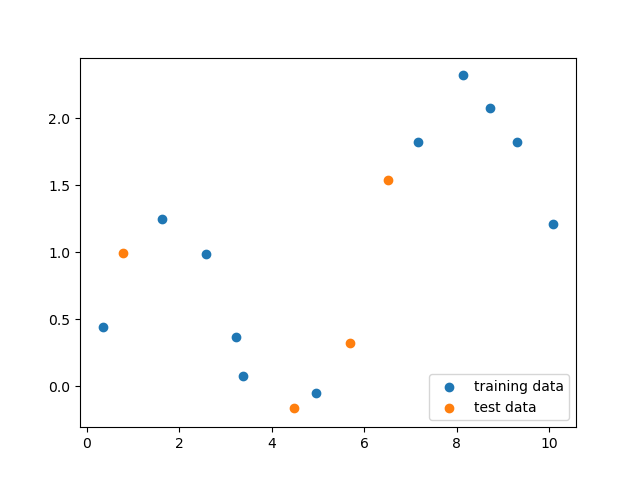

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Visualize the dataset by plotting a scatterplot of the data points
# in the training and test sets.

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);
    

### Polynomial LinearRegression

In this part we fit a polynomial LinearRegression model for degrees 0 to 9. Using PolynomialFeatures in sklearn.preprocessing we can create the polynomial features and then fit a linear regression model For each model.


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics.regression import r2_score

    
#initialization variables
X = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
Xt = X_test[:, np.newaxis]
yt = y_test[:, np.newaxis]

r2_train = np.zeros(10)
r2_test = np.zeros(10)

degree_predictions = np.zeros((10, 100))

# generate points used to plot
x_plot = np.linspace(0, 10, 100) #find 100 predicted values over the interval x = 0 to 10
X_plot = x_plot[:, np.newaxis]


for count, degree in enumerate([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    a = model.predict(X_plot)
    degree_predictions[count] = a.transpose()
    #r2 score
    r2_train[count] = model.score(X, y)
    r2_test[count] = model.score(Xt, yt)
    


<IPython.core.display.Javascript object>


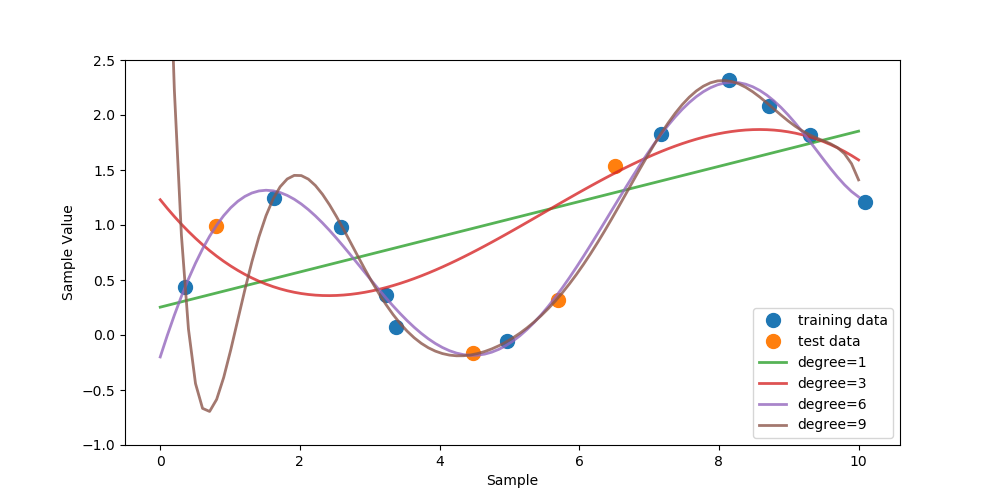

Text(0, 0.5, 'Sample Value')

In [3]:
# Plot the models
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), degree_predictions[degree], alpha=0.8, lw=2, label='degree={}'.format(degree))
plt.ylim(-1,2.5)
plt.legend(loc=4)
plt.xlabel("Sample")
plt.ylabel("Sample Value")

### Plot the $R^2$ (coefficient of determination) regression score


<IPython.core.display.Javascript object>


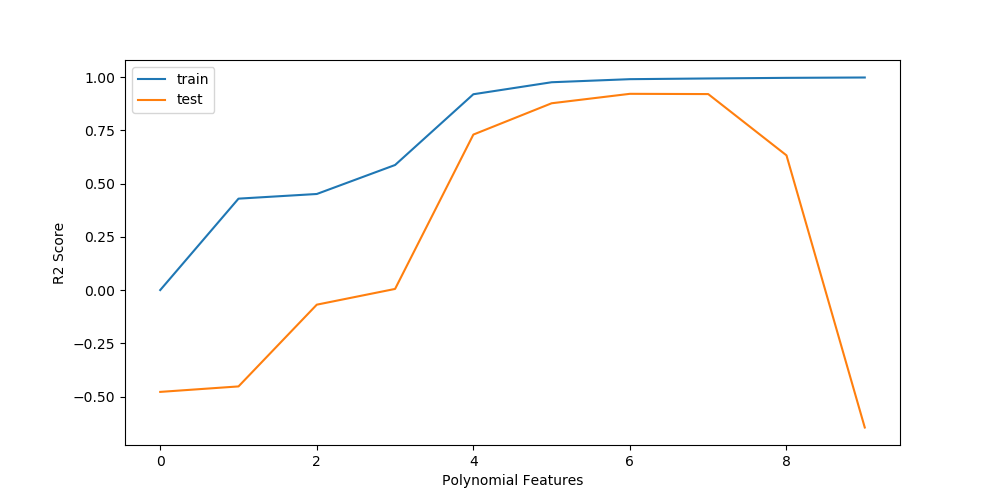

Text(0, 0.5, 'R2 Score')

In [4]:
plt.figure(figsize=(10,5))
plt.plot(range(10),r2_train , '-', label='train', markersize=10)
plt.plot(range(10),r2_test, '-', label='test', markersize=10)
plt.legend(loc='best')
plt.xlabel("Polynomial Features")
plt.ylabel("R2 Score")


### Determinig underfitting and Overfitting



In [5]:

Underfitting = np.where(r2_train == np.amin(r2_train))[0][0] 
Overfitting = np.where(r2_train == np.amax(r2_train))[0][0] 
Good_Generalization = np.where(r2_test == np.amax(r2_test))[0][0]

print("Underfitting: ",Underfitting)
print("Overfitting:",Overfitting) 
print("Good Generalization:",Good_Generalization)

Underfitting:  0
Overfitting: 9
Good Generalization: 6


### Regularized models

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as Ridge and Lasso linear regression.

For this example we train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

#initialization variables
X = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
Xt = X_test[:, np.newaxis]
yt = y_test[:, np.newaxis]

#get polynomial Features
poly = PolynomialFeatures(degree=12)
X_poly_train = poly.fit_transform(X)
X_poly_test = poly.fit_transform(Xt)

#Lineal Regression fit and score
linreg = LinearRegression().fit(X_poly_train, y)
LinearRegression_R2_test_score = linreg.score(X_poly_test, yt)

#Lasso fit and score
linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_poly_train, y)
Lasso_R2_test_score = linlasso.score(X_poly_test, yt)

print("LinearRegression R2 score", LinearRegression_R2_test_score)
print("Lasso R2 score", Lasso_R2_test_score)


LinearRegression R2 score -4.312001797497546
Lasso R2 score 0.8406625614750235


/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3556421695890253, tolerance: 0.0006894982540382801
  positive)


From the scores above we can see that for the same degree of polynomial features, lasso regression performs well and linear regression is overfitting.

## Classification

For this section we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided in the csv file:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Reading data
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

#split data into X and y
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

# use the variables X_train2, y_train2 for Question 5
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 6 and 7, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split created above as the representative subset.
#
# Use the variables X_subset, y_subset for Questions 6 and 7.
X_subset = X_test2
y_subset = y_test2


### Important features

In train a DecisionTreeClassifier. What are the 5 most important features found by the decision tree?


The Names of top 5 features are: ['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


<IPython.core.display.Javascript object>


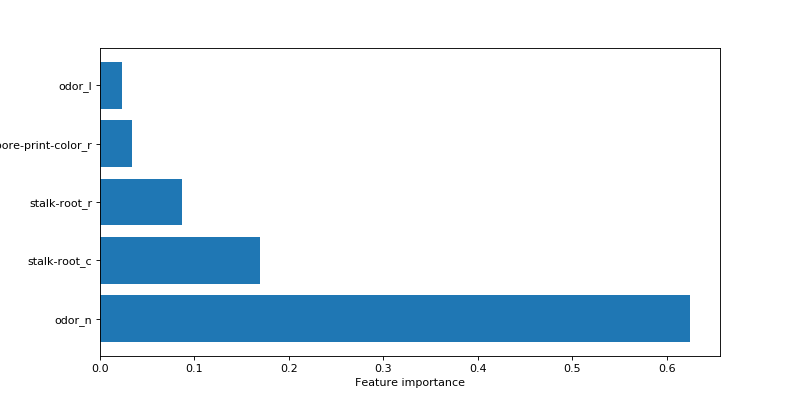

In [8]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)



df = pd.Series(data = clf.feature_importances_
                  , index = X_train2.columns
                  , name = 'Importances').sort_values(ascending= False)
dfTop5= df[:5]
dfTop5Names = dfTop5.index.tolist()
print("The Names of top 5 features are:", dfTop5Names)

#plot the top 5 of the features
plt.figure(figsize=(10,5), dpi=80)

feature_names = dfTop5Names
c_features = len(feature_names)
plt.barh(range(c_features), dfTop5)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), feature_names)

plt.show()


### validation_curve

For this example, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

With this classifier, and the dataset in X_subset, y_subset, we explore the effect of `gamma` on classifier **accuracy** by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10`. 

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

We can find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.


/home/adrian/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


<IPython.core.display.Javascript object>


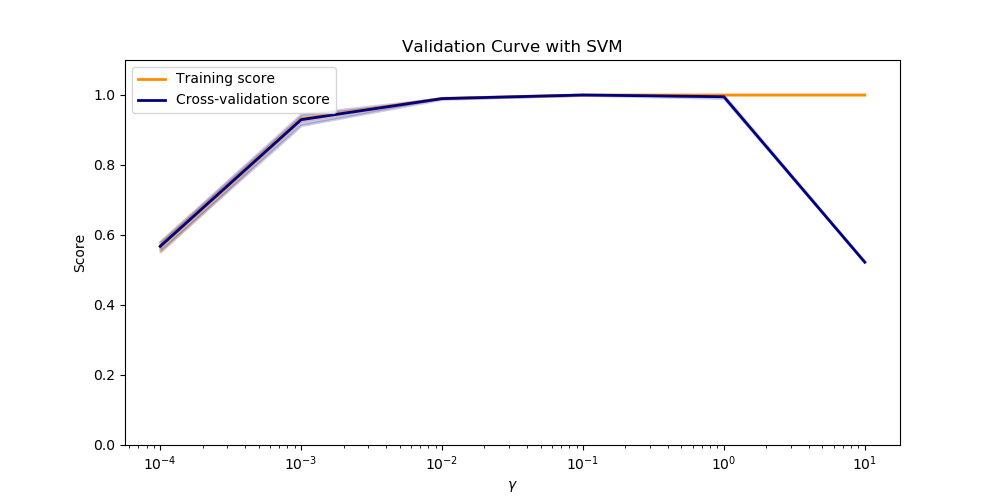

In [9]:

from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#create a parameter range variable
param_range = np.logspace(-4,1,6)

#SVC model
svc = SVC(kernel = 'rbf', C= 1, random_state=0)

#Get the validation curve
train_scores, test_scores = validation_curve(
    svc, X_subset , y_subset, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)

#mean of train accuracy
train_scores_mean = np.mean(train_scores, axis=1)
#std of train accuracy
train_scores_std = np.std(train_scores, axis=1)
#mean of test accuracy
test_scores_mean = np.mean(test_scores, axis=1)
#std of test accuracy
test_scores_std = np.std(test_scores, axis=1)

#plot the validation curve with svm
plt.figure(figsize=(10,5))
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
#plot mean of train accuracy
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
#fill between std of train accuracy
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
#plot mean of test accuracy
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
#fill between std of test accuracy
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()



### Determining Underfitting, Overfitting and Good Generalization

What gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? 

In [10]:
param_range = np.logspace(-4,1,6)
Underfitting = np.where(train_scores_mean == np.amin(train_scores_mean))[0][0] 
Overfitting = np.where(train_scores_mean == train_scores_mean[5])[0][0] 
Good_Generalization = np.where(test_scores_mean == np.amax(test_scores_mean))[0][0]

Underfitting = param_range[Underfitting]
Overfitting = param_range[5]
Good_Generalization = param_range[Good_Generalization]

print("Underfitting: ",Underfitting)
print("Overfitting:",Overfitting) 
print("Good Generalization:",Good_Generalization)


Underfitting:  0.0001
Overfitting: 10.0
Good Generalization: 0.1
